In [10]:
from iexfinance.stocks import get_historical_data
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import scorer, accuracy_score

In [13]:
start = datetime(2017,1,1)
end  = datetime(2018,10,1)

Df = get_historical_data('SPY', start=start, end=end, output_format='pandas')

In [29]:
y = np.where(Df['close'].shift(-1)>=Df['close'],1,-1)

In [18]:
Df['open-close'] = Df.open - Df.close
Df['high-low'] = Df.high - Df.low

X = Df[['open-close', 'high-low']]

In [55]:
split_percentage = 0.8
split = int(split_percentage * len(Df))

In [23]:
X_train = X[:split]
X_test = X[split:]

In [27]:
y_train = y[:split]
y_test = y[split:]

In [30]:
cls = SVC().fit(X_train, y_train)

In [33]:
cls.predict(X_test)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1])

In [34]:
accuracy = accuracy_score(y_test, cls.predict(X_test))

In [36]:
accuracy

0.5909090909090909

In [38]:
accuracy = accuracy_score(y_train, cls.predict(X_train))

In [39]:
accuracy

0.6051136363636364

In [40]:
Df['Predicted_Signal'] = cls.predict(X)

In [46]:
Df['Return'] = np.log(Df.close.shift(-1) / Df.close) * 100

In [49]:
Df['Strategy_Return'] = Df.Return * Df.Predicted_Signal

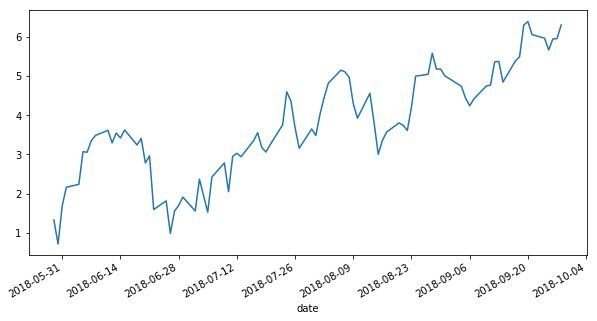

In [51]:
Df.Strategy_Return[split:].cumsum().plot(figsize=(10,5))

In [53]:
Df[Df['Strategy_Return'] > 0]

,open,high,low,close,volume,open-close,high-low,Predicted_Signal,Return,Strategy_Return
date,,,,,,,,,,
2017-01-03,217.9106,218.6756,216.7909,218.1043,91366522,-0.1937,1.8847,1,0.593136,0.593136
2017-01-05,219.1016,219.4018,218.3366,219.2275,78379012,-0.1259,1.0652,1,0.357118,0.357118
2017-01-10,219.3050,220.2442,218.8499,219.2856,63771939,0.0194,1.3943,1,0.282201,0.282201
2017-01-12,219.3243,219.5664,217.8283,219.3534,72113181,-0.0291,1.7381,1,0.229275,0.229275
2017-01-17,219.1404,219.5955,218.6465,219.0823,61240814,0.0581,0.9490,1,0.220723,0.220723
2017-01-19,219.6536,219.8085,218.2689,218.7530,66608787,0.9006,1.5396,1,0.366727,0.366727
2017-01-23,219.1791,219.6197,218.1333,218.9854,75061645,0.1937,1.4864,1,0.639137,0.639137
2017-01-24,219.2275,220.8543,219.1016,220.3895,95555295,-1.1620,1.7527,1,0.861834,0.861834
2017-01-31,219.7891,220.3895,219.1500,220.3217,75880805,-0.5326,1.2395,1,0.039571,0.039571
